# <center>Building Simple Neural Network with Only Two Neurons and Hidden Layers</center>

## Introduction
In this lab, we will build a neural network from scratch and code how it performs predictions using forward propagation. After doing forward propagation, we are going to use backpropagation. We are going to use sigmoid function for our model.

We will iteratively repeate the following steps in our code:

**1-Calculate network output using forward propagation.**

**2-Calculate error between ground truth and estimated output.**

**3-Ipdate weights and biases throught back propagation.**

**4-Repeate the above three steps until number of iterations is reached or error between ground truth (T) and predicted output (a<sub>2</sub>) is below a predefined threshold.**


Please note that all deep learning libraries have the entire training and prediction processes implemented.



### Importing Libraries

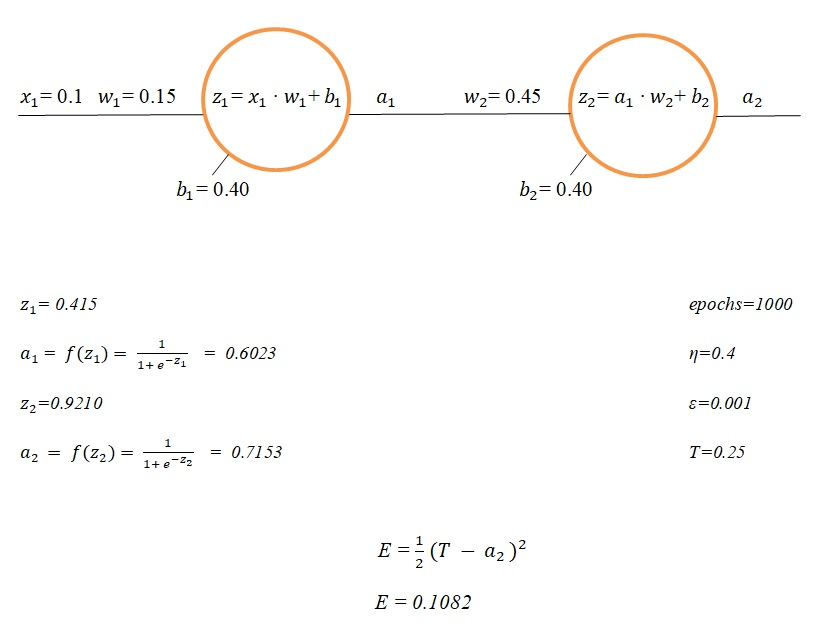

In [1]:
import numpy as np
from IPython.display import Image
Image(filename='image_folder/back_prop.jpg')

### Creating parameters

In [2]:
weights = [0.15, 0.45]
biases = [0.40, 0.65]
T = 0.25
lr = 0.4
threshold = 0.001
epochs=1000

Let's print the weights and biases

In [3]:
print(weights)
print(biases)

[0.15, 0.45]
[0.4, 0.65]


### Weights

In [4]:
print(f'\nw\u2081: {weights[0]}') #  weight 1
print(f'w\u2082: {weights[1]}') #  weight 2


w₁: 0.15
w₂: 0.45


### Biases

In [5]:
print(f'\nb\u2081: {biases[0]}') #  bias 1
print(f'b\u2082: {biases[1]}') #  bias 2


b₁: 0.4
b₂: 0.65


Now that we have the weights and the biases defined for the network, let's compute the output for a given input x<sub>1</sub>.

In [6]:
x_1 = 0.1
print(f"Input of our network: {x_1}")

Input of our network: 0.1


### Calculate a<sub>2</sub> and  Error

Let's start by computing the wighted sum of the input, z<sub>1</sub> at the first node of the hidden layer.

In [7]:
z_1 = x_1 * weights[0] + biases[0]

print('The weighted sum of the input at the first node in the first hidden layer is {}'.format(z_1))

The weighted sum of the input at the first node in the first hidden layer is 0.41500000000000004


Using a sigmoid function as the activation function, the output of the network would be 0.6023.

In [8]:
a_1 = 1.0 / (1.0 + np.exp(-z_1))
a_1

0.6022861768886306

Let's start computing the wighted sum of the input, z<sub>2</sub> at the first node of second hidden layer.

In [9]:
z_2 = a_1 * weights[1] + biases[1]

print('The weighted sum of the input at the first node in second hidden layer is {}'.format(z_2))

The weighted sum of the input at the first node in second hidden layer is 0.9210287795998838


In [10]:
a_2 = 1.0 / (1.0 + np.exp(-z_2))
print(f'Model predicted or estimated as {a_2}')

Model predicted or estimated as 0.7152516802527555


Let's calculate error between predicted output (a<sub>2</sub>) and the ground truth (T)

In [11]:
E = 1 / 2 * (T - a_2) ** 2
E

0.10822956298900614

## Updating Weights and Biases

### Updating w<sub>2</sub>

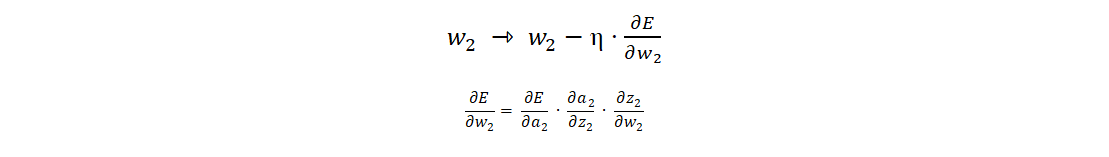

In [12]:
Image(filename='image_folder/update_w2.png')

In [13]:
weights[1] = weights[1] - lr * (-(T - a_2)) * (a_2 * (1 - a_2)) * a_1

print(f'Updated w\u2082 value is {weights[1]}')

Updated w₂ value is 0.42717184071957803


### Updating b<sub>2</sub>

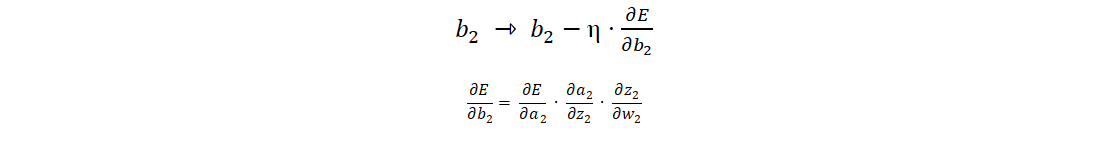

In [14]:
Image(filename='image_folder/update_b2.png')

In [15]:
biases[1] = biases[1] - lr * (-(T - a_2)) * (a_2 * (1 - a_2)) * 1

print(f'Updated b\u2082 value is {biases[1]}')

Updated b₂ value is 0.6120974876123662


### Updating w<sub>1</sub>

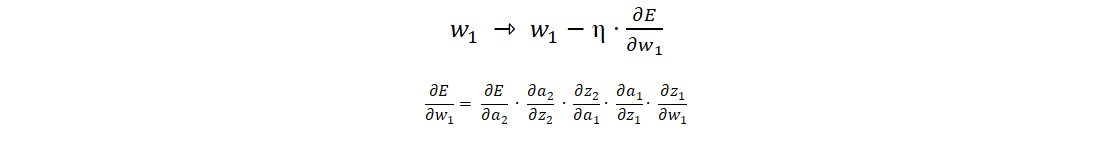

In [16]:
Image(filename='image_folder/update_w1.png')

In [17]:
weights[0] = weights[0] - lr * (-(T - a_2)) * (a_2 * (1 - a_2)) * weights[1] * (a_1 * (1 - a_1)) * x_1

print(f'Updated w\u2081 value is {weights[0]}')

Updated w₁ value is 0.14961216750329454


### Updating b<sub>1</sub>

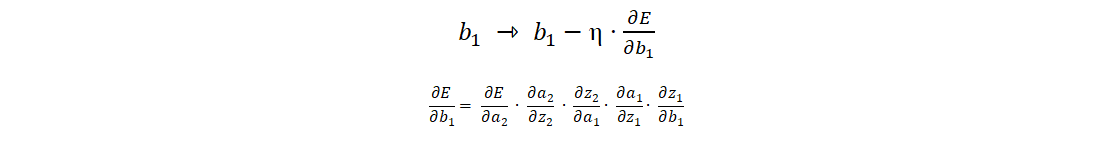

In [18]:
Image(filename='image_folder/update_b1.png')

In [19]:
biases[0] = biases[0] - lr * (-(T - a_2)) * (a_2 * (1 - a_2)) * weights[1] * (a_1 * (1 - a_1)) * 1

print(f'Updated b\u2081 value is {biases[0]}')

Updated b₁ value is 0.39612167503294543


Let's print out our updated biases and weights:

In [20]:
print(weights)
print(biases)
print(f'\nw\u2081: {weights[0]}') #  weight 1
print(f'w\u2082: {weights[1]}') #  weight 2
print(f'\nb\u2081: {biases[0]}') #  bias 1
print(f'b\u2082: {biases[1]}') #  bias 2

[0.14961216750329454, 0.42717184071957803]
[0.39612167503294543, 0.6120974876123662]

w₁: 0.14961216750329454
w₂: 0.42717184071957803

b₁: 0.39612167503294543
b₂: 0.6120974876123662


## Creating Function to Make Forward and Back Propagation

In [21]:
def forw_backProp(x_1, w_1, w_2, b_1, b_2, T, lr, treshold, epochs):
    
    i = 0
    while i < epochs:
        
        # Calculate z_1
        z_1 = x_1 * w_1 + b_1
        # Calculate a_1
        a_1 = 1.0 / (1.0 + np.exp(-z_1))
        # Calculate z_2
        z_2 = a_1 * w_2 + b_2
        # Calculate a_2
        a_2 = 1.0 / (1.0 + np.exp(-z_2))        
        # Calculate error between predicted value and the ground truth.
        E = 1 / 2 * (T - a_2) ** 2

        # Updating weights and biases
        w_2 = w_2 - lr * (-(T - a_2)) * (a_2 * (1 - a_2)) * a_1
        b_2 = b_2 - lr * (-(T - a_2)) * (a_2 * (1 - a_2)) * 1
        w_1 = w_1 - lr * (-(T - a_2)) * (a_2 * (1 - a_2)) * w_2 * (a_1 * (1 - a_1)) * x_1
        b_1 = b_1 - lr * (-(T - a_2)) * (a_2 * (1 - a_2)) * w_2 * (a_1 * (1 - a_1)) * 1        
        i+=1
        
        ## print(f'\nw\u2081: {w_1}') #  weight 1
        ## print(f'w\u2082: {w_2}') #  weight 2
        ## print(f'\nb\u2081: {b_1}') #  bias 1
        ## print(f'b\u2082: {b_2}') #  bias 2
        
        print(f'\nEpoch {i} - Error {E} - Output {a_2}')
        
    

In [22]:
forw_backProp(0.1, 0.15, 0.45, 0.4, 0.65, 0.25, 0.4, 0.001, 1000)


Epoch 1 - Error 0.10822956298900614 - Output 0.7152516802527555

Epoch 2 - Error 0.10329995305282419 - Output 0.7045326238078499

Epoch 3 - Error 0.09839793764315473 - Output 0.6936168113206593

Epoch 4 - Error 0.09354432779103837 - Output 0.6825374614782825

Epoch 5 - Error 0.0887596042227016 - Output 0.6713302842728056

Epoch 6 - Error 0.08406346900249696 - Output 0.6600328499096065

Epoch 7 - Error 0.07947441932910594 - Output 0.6486838831182067

Epoch 8 - Error 0.07500936523709399 - Output 0.6373225148041203

Epoch 9 - Error 0.07068330990320354 - Output 0.6259875261313959

Epoch 10 - Error 0.06650910655345568 - Output 0.6147166202778691

Epoch 11 - Error 0.062497300183178076 - Output 0.6035457542756753

Epoch 12 - Error 0.05865605613466568 - Output 0.5925085579505005

Epoch 13 - Error 0.054991171729174095 - Output 0.581635859729234

Epoch 14 - Error 0.05150616221621299 - Output 0.5709553308989056

Epoch 15 - Error 0.048202408689115975 - Output 0.5604912516935573

Epoch 16 - Error 

Epoch 521 - Error 2.3323386236901516e-11 - Output 0.2500068298442496

Epoch 522 - Error 2.243095019915699e-11 - Output 0.25000669790268654

Epoch 523 - Error 2.1572662526715144e-11 - Output 0.2500065685101091

Epoch 524 - Error 2.074721652717421e-11 - Output 0.2500064416172701

Epoch 525 - Error 1.99533555091669e-11 - Output 0.2500063171758736

Epoch 526 - Error 1.9189870872189665e-11 - Output 0.2500061951385573

Epoch 527 - Error 1.8455600263077362e-11 - Output 0.2500060754588737

Epoch 528 - Error 1.7749425808471562e-11 - Output 0.25000595809127296

Epoch 529 - Error 1.707027241243858e-11 - Output 0.25000584299108547

Epoch 530 - Error 1.6417106117332403e-11 - Output 0.2500057301145045

Epoch 531 - Error 1.578893253194274e-11 - Output 0.2500056194185699

Epoch 532 - Error 1.5184795316919177e-11 - Output 0.25000551086115175

Epoch 533 - Error 1.460377472738224e-11 - Output 0.25000540440093394

Epoch 534 - Error 1.4044986213878424e-11 - Output 0.25000529999739884

Epoch 535 - Error 1.3

Epoch 934 - Error 2.34511503855799e-18 - Output 0.2500000021656939

Epoch 935 - Error 2.255385530870213e-18 - Output 0.2500000021238576

Epoch 936 - Error 2.1690895202434096e-18 - Output 0.2500000020828296

Epoch 937 - Error 2.0860953161462762e-18 - Output 0.2500000020425941

Epoch 938 - Error 2.0062766756527656e-18 - Output 0.2500000020031359

Epoch 939 - Error 1.9295119287862712e-18 - Output 0.25000000196443983

Epoch 940 - Error 1.8556844710820347e-18 - Output 0.25000000192649136

Epoch 941 - Error 1.7846818225501202e-18 - Output 0.25000000188927596

Epoch 942 - Error 1.7163959107401513e-18 - Output 0.2500000018527795

Epoch 943 - Error 1.6507228051103891e-18 - Output 0.25000000181698806

Epoch 944 - Error 1.5875624686368762e-18 - Output 0.250000001781888

Epoch 945 - Error 1.5268187197186296e-18 - Output 0.250000001747466

Epoch 946 - Error 1.4683991869771918e-18 - Output 0.25000000171370895

Epoch 947 - Error 1.4122149777294256e-18 - Output 0.25000000168060404

Epoch 948 - Error 1

## Creating Function to Plot Error in Forward and Back Propagation

In [23]:
def prop_Visual(x_1, w_1, w_2, b_1, b_2, T, lr, treshold, epochs):
    
    import matplotlib.pyplot as plt
    
    epoch=[]
    error=[]
    
    i = 0
    while i < epochs:
        
        # Calculate z_1
        z_1 = x_1 * w_1 + b_1
        # Calculate a_1
        a_1 = 1.0 / (1.0 + np.exp(-z_1))
        # Calculate z_2
        z_2 = a_1 * w_2 + b_2
        # Calculate a_2
        a_2 = 1.0 / (1.0 + np.exp(-z_2))        
        # Calculate error between predicted value and the ground truth.
        E = 1 / 2 * (T - a_2) ** 2

        # Updating weights and biases
        w_2 = w_2 - lr * (-(T - a_2)) * (a_2 * (1 - a_2)) * a_1
        b_2 = b_2 - lr * (-(T - a_2)) * (a_2 * (1 - a_2)) * 1
        w_1 = w_1 - lr * (-(T - a_2)) * (a_2 * (1 - a_2)) * w_2 * (a_1 * (1 - a_1)) * x_1
        b_1 = b_1 - lr * (-(T - a_2)) * (a_2 * (1 - a_2)) * w_2 * (a_1 * (1 - a_1)) * 1  
        error.append(E)
        epoch.append(i)        
        i+=1
    
    plt.plot(epoch, error)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.show()
   

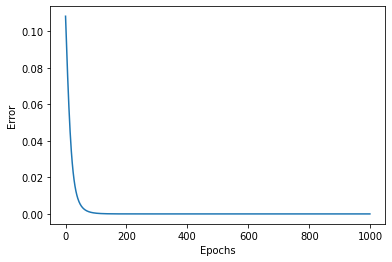

In [24]:
prop_Visual(0.1, 0.15, 0.45, 0.4, 0.65, 0.25, 0.4, 0.001, 1000)

As we can see from the plot, our model working relatively great.

Tips:

**Small treshold : Slow convergence**

**Large treshold : Our error may not decrease on every iteration; may not converge.**

**Make sure that you are using treshold like 0.001, 0.01, 0.1 and etc.**